- ## 요약
    1. Edge detection
        - Sobel filter
        - Scharr filter

    2. CNN 연산
        - Padding
        - Stride
        - 크기 계산
            - 출력
            - 파라미터 갯수
        - cnn 수식
    3. pooling
        - max pooling
        - average pooling
    4. CNN 예시 연구
        - Lenet-5
        - AlexNet
        - VGG-16
    5. ResNet
    6. $1*1$ conv
    7. Inception network
        - bottleneck layer
    8. MobileNet
        - Depthwise Separable Convolution
        - MobileNet V2
            - Bottleneck block
            - expansion
    9. EfficientNet
        - $r,w,d$
    10. 전이 학습
    11. 데이터 증강
        - 미러링
        - 크롭
        - color shifting
        

- ## Edge detection
    - 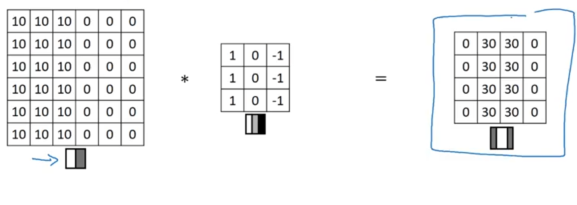
    - 이미지 픽셀 값과 특정한 형태의 특징(수직선,세로선, 경계선)을 정의하는 필터(커널) 을 합성곱하여 특징 맵을 추출한다
    - 필터의 종류는 여러가지 있음
        - Sobel filter
        - Scharr filter
- ## CNN 연산
    - 패딩
        - 필터 행렬곱 연산을 하면 이미지 가장자리의 정보가 많이 버려지게 됨
        - 이를 방지하기 위해 가장자리에 패딩 추가함
        - Valid
            - 패딩 추가 안한 이미지를 말함
        - Same
            - 패딩을 적절하게 추가하여 출력 행렬 크기와 입력 행렬 크기를 같도록 함
            - $p= \frac{f-1}{2}$
    - 스트라이드
        - 슬라이딩 윈도우 연산 시 이동하는 요소의 거리
        - 수직 수평 모두 포함함
    - 필터 연산 이후의 행렬 크기
        - 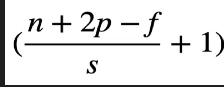
    - 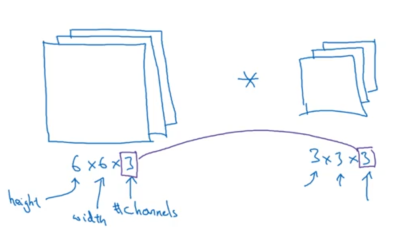
    - 색상이 있는 이미지를 연산할 시에는 필터와 채널 모두 rgb를 의미하는 채널이 추가 차원으로 쓰인다
    - 각 색상별로 필터를 합성곱 한 후 각 채널의 값끼리 더해 2차원 행렬의 출력을 만든다
    - 필터를 여러 개 사용시 출력값으로 한 차원이 추가된다
    - ex)$n*n$ 이미지를 $f*f$ 필터에 $o$ 개의 필터를 연산할경우 (스트라이드 1 패딩 0 가정)
        - 출력 행렬의 크기는 $(n-f+1)*(n-f+1)*o$ 이다

    - 파라미터 갯수
        - $\{(f*f)+1\}*필터 갯수$

- ## CNN 수식
    $ f^{[l]} = \text{filter size} $

    $ p^{[l]} = \text{padding} $

    $ s^{[l]} = \text{stride} $

    $ n_c^{[l]} = \text{number of filters} $

    **Each filter is:**  $ f^{[l]} \times f^{[l]} \times n_c^{[l-1]} $

    **Input:**  $ n_H^{[l-1]} \times n_W^{[l-1]} \times n_c^{[l-1]} $

    **Output:**  $ n_H^{[l]} \times n_W^{[l]} \times n_c^{[l]} $

    $ n_W^{[l]} = \left\lfloor \frac{n_W^{[l-1]} + 2p^{[l]} - f^{[l]}}{s^{[l]}} + 1 \right\rfloor $

    **Activations:**  $ A^{[l]} \rightarrow n_H^{[l]} \times n_W^{[l]} \times n_c^{[l]} $

    **Batch Activations:**  $ A^{[l]} \rightarrow m \times n_H^{[l]} \times n_W^{[l]} \times n_c^{[l]} $

    **Weights:**  $ f^{[l]} \times f^{[l]} \times n_c^{[l-1]} \times n_c^{[l]} $

    **Bias:**  $ n_c^{[l]} $



- ## 풀링
    - Max pooling
        - $f*f$ 크기의 구역으로 나눈 뒤 해당 구역중 가장 높은 값을 출력행렬에 기록
        - 왼쪽 위 기준으로 생각할것
        - f,s 하이퍼파리미터
        - 특정의 지역적인 특성 반영됨
    - Average pooling
        - 같은 방식으로 평균값 행렬 기록
        - 일반적으론 사용안함
    - 학습 변수 없음
    - 풀링후 행렬크기
    - 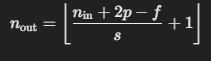

- ## CNN 예시 연구
    - Lenet-5
        - 그레이스케일에 사용
        - 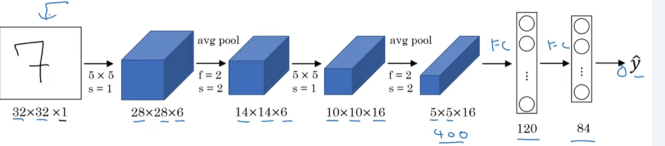
            - 과거엔 소프트맥스 대신 다른 분류기 사용했음
            - avg pool 사용했었음
            - 60k 가량의 파라미터
    - AlexNet
        - 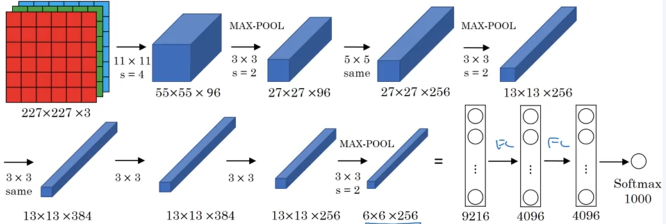
        - Lenet 와 비슷하나 규모가 더 커짐
        - 6천만개 가량의 파라미터
        - ReLu 사용
    - VGG-16
        - 거대한 신경망을 사용하는 대신 더욱 단순화시킴
        - 필터는 3x3 s=1 same 고정
        - 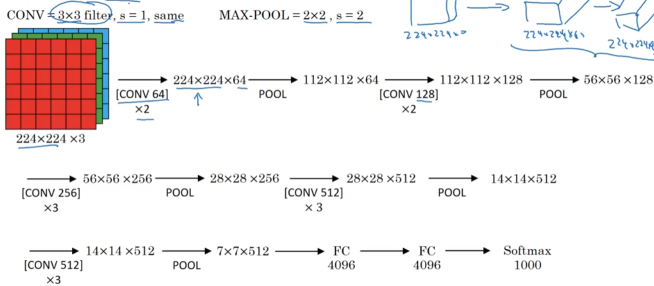
        - 1.3 억 가량의 파라미터
        

- ## Resnet
    - 매우 깊은 신경망을 학습하는데 사용함
    - Residual block
        - 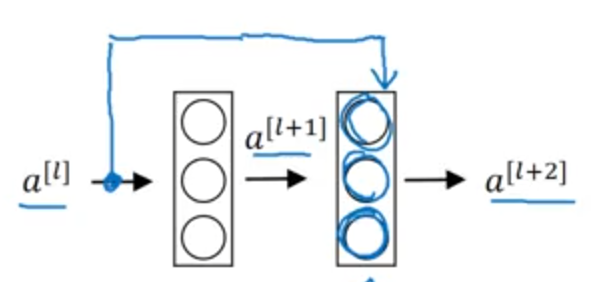
        - 과거 레이어의 신경망을 몇개의 레이어를 뛰어넘어 활성화 함수 이전에 연결해 skip connection 을 형성함으로써
        - 정보를 더 깊게 침투할수 있도록 하여 기울기 소실 문제를 해결하는데에 상요함
        - $ a^{[l+2]} = g \left( z^{[l+2]} + a^{[l]} \right) $
            - 기울기 소실로 활성화 함수의 기존값이 0이 됐다면 skip connection 을 형성한 레이어의 값이 대신 들어감을 알수있음
    - 아무 변화를 가하지 않은 plain block 에 skip connection을 형성하여 residual block를 형성

    - 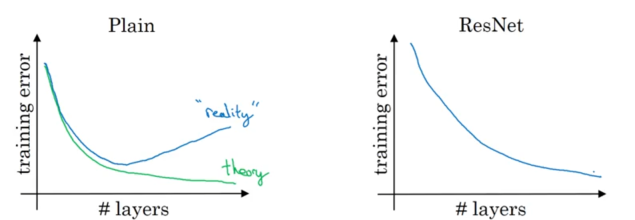
    - 깊은 단계의 학습에 효과적임
    
    - 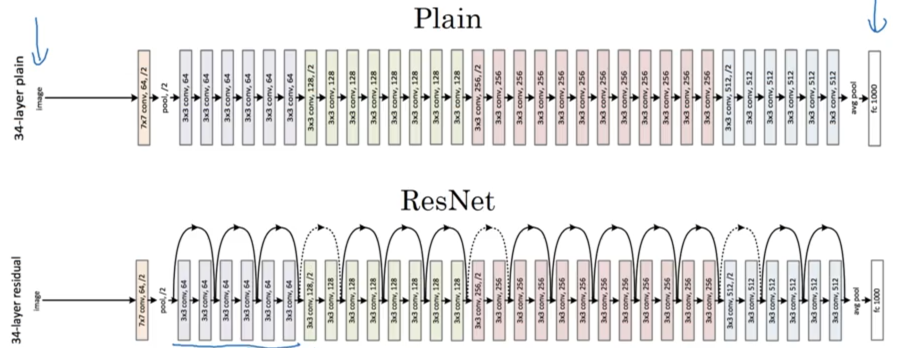

- ## $1*1$ convolution
    - $1*1$ 필터로 합성곱 연산을 수행함
    - 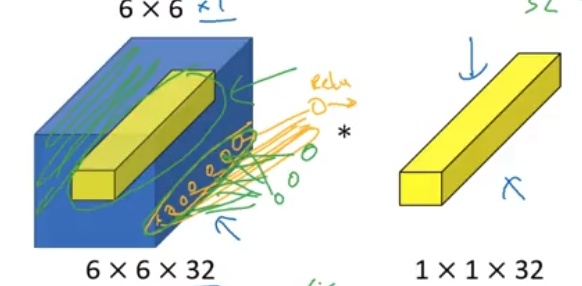
    - 입력의 한 픽셀에 대해 채널끼리 fc layer를 형성한 효과를 가짐
        - 비선형성이 증가
    - 입력 채널을 축소시킬수 있음
        - 192개의 채널을 가진 입력을 $1*1*192$ 크기의 32개 필터와 연산을 하면 $n*n*32$ 크기의 행렬이 됨 

- ## Inception network
    - 한 레이어에 다양한 크기의 필터를 병렬적으로 쌓아 다양한 스케일의 특징을 추출함.
    - 다만 이 과정에서 높은 연산 비용이 발생하기 때문에 $1*1$ conv 로 구성된 bottleneck layer 을 통해
    - 우선적으로 차원을 줄인 다음, 다양한 크기의 필터를 연산하고 합쳐 인셉션 모듈을 만듬
    - 구현
    - 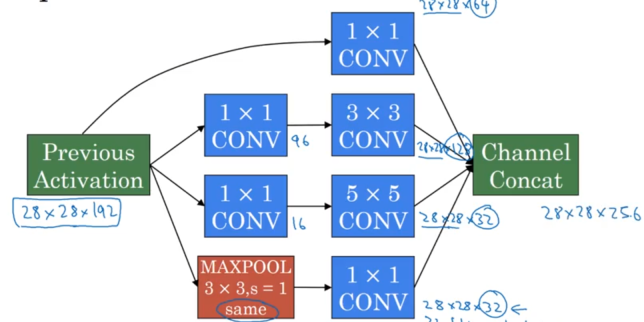
    - 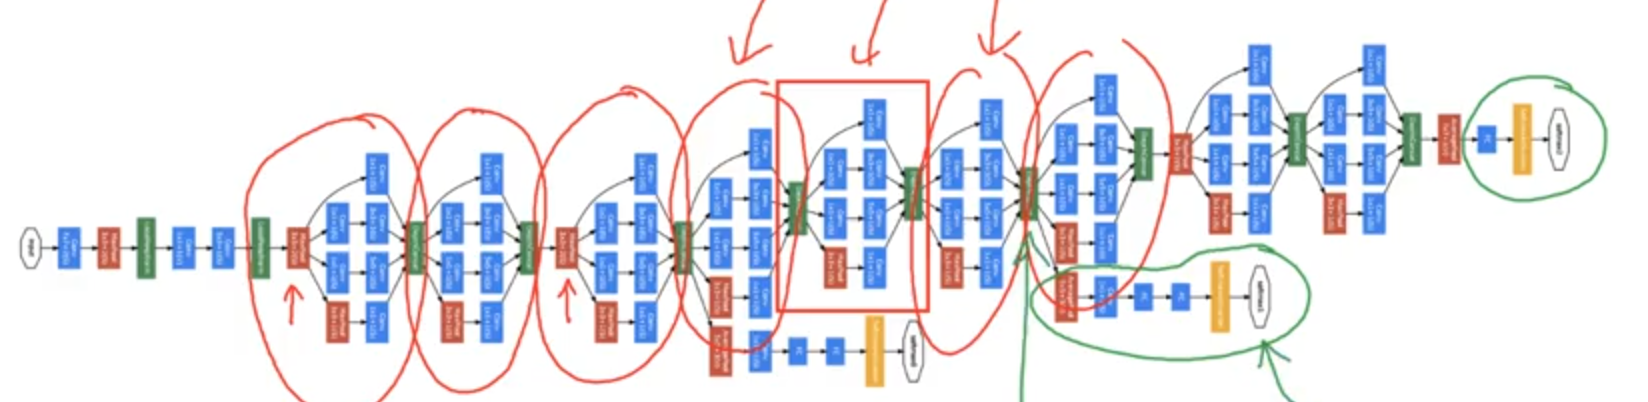
        - 여러 층을 인셉션 모듈을 일렬로 연결함
        - 몇몇 은닉 레이어를 사용해 분류기로 예측을 하고,
        - 최종적으로 모든 분류기에 softmax 함수연산을 해 결과를 출력한다
            - 정규화 효과가 있음
        

- ## MobileNet
    - 휴대용 기기, 저성능 기기에서 사용하기 위한 신경망임
    - Depthwise Separable Convolution
        - 기존 커널 연산을 Depthwise 와 pointwise 로 나눠 연산함
            - $6*6*3$ 이미지를 $3*3*3$ 커널 16개에 넣는 경우
                - $3*3*3$ 커널 16개 연산을 $3*3*3$ depthwise 연산, $1*1*1*16$ pointwise 연산으로 분리
                - depthwise, pointwise 순으로 연산함
        - 약 10배 정도 저렴함

    - MobileNet v2
        - bottleneck block
            - 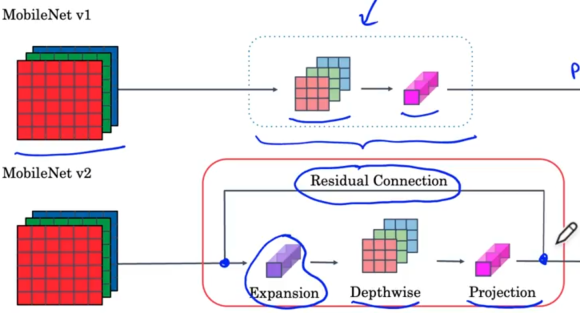

            - 기존 연산에 잔차 연결, expansion 연산 추가
            - expansion 연산
                - 기존 입력의 채널을 키우는 $1*1$ 연산임
                    - $1*1$ 필터 연산에 기존 입력보다 더 많은 숫자의 필터를 사용해 채널의 크기를 확장시킴
                - 채널을 확장시킴으로써 bottleneck block 내부의 표현력을 상승시킴
            - expansion 연산을 통해 표현력을 확장시킨 다음, 메모리 제약을 만족시키기 위해 pointwise 연산으로 채널을 축소시킴



- ## EfficientNet
    - 신경망의 성능을 향상하기 위해
    - $r$ : 입력 이미지의 해상도를 올리거나
    - $d$ : 신경망의 깊이를 올리거나
    - $w$ : 신경망 레이어 크기를 키울수 잇음
    - EffeicientNet 를 사용해 제약적인 환경에서 적절한 $ r, w, d $ 값을 얻을 수 있음
    

- ## 전이 학습
    - 빠르게 모델을 구축하고 싶다면 타인이 사전에 구축해둔 모델을 사전 모델로 사용하고 새로운 작업에 사용하면 훨씬 빠른 속도로 구축 가능함
    - 기존 모델에 소프트맥스 레이어를 제거하고 새로운 소프트맥스 레이어를 구축하면 월등히 빠름

    - 더 빠른 학습을 위해서 초기 저단계 레이어를 고정시키고, 고단계 레이어를 학습시킬수 있음
    - 가진 훈련 데이터셋의 양에 따라 일부 레이어만 학습시킬수 있고, 충분한 데이터가 있으면 전체 레이어를 다시 학습시켜도 됨
    
    

- ## 데이터 증강
    - 미러링
        - x,y 축으로 대칭이동시킴
    - 크롭
        - 이미지의 일부를 자르기해 데이터로 사용
    - Color shifting
        - 데이터의 색상에 변화를 가함
        - 각 색상 채널에 변형을 가한 다음 데이터로 사용
        - PCA 
            - 틴트는 유지하고, rgb 값에 변형을 가함
    - Rotation
    - Shearing
    - Local warping

    - 훈련 도중 구현
        - 이미지를 로드하고, 새로운 스레드에서 데이터 왜곡을 가해 전달하여 병렬 프로그래밍함
    

- 훈련 가이드라인
    - 훈련 데이터 양에 따라
        - 적을 시
            - 최적화 중시
            - 데이터 구축에 시간을 들이는것도 좋으나 최적화에 신경쓰는것이 차후에 도움이 됨
        - 많을 시
            - 단순한 알고리즘 사용
            
    - 벤치마크시
        - ensembling
            - 동일한 알고리즘을 독립적으로 여러번 훈련시킨 후 예측치를 평균화함
        - multi-crop at test time
